# Worksheet 18

Name:  Haoxiang Huo
UID: U13668934

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

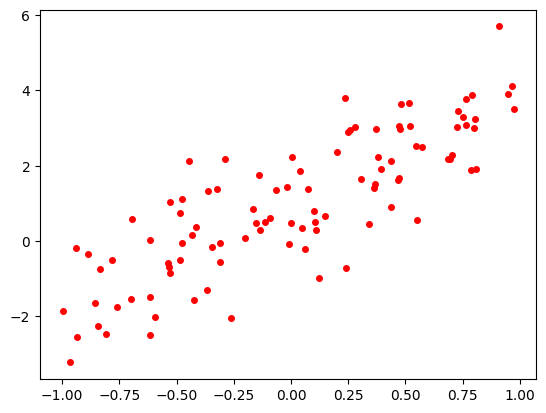

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

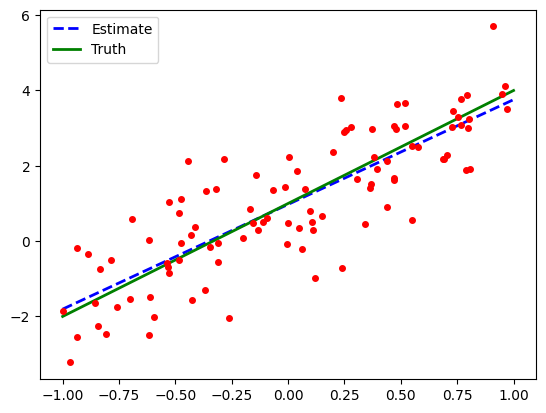

In [2]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated coefficients of beta from the least squares regression are approximately [0.92, 3.24], compared to the parameter that used to generate the data, which are [1, 3]. This shows that the least squares estimate is quite close to the true values, indicating effective modeling of the underlying linear relationship despite the presence of noise in the data.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

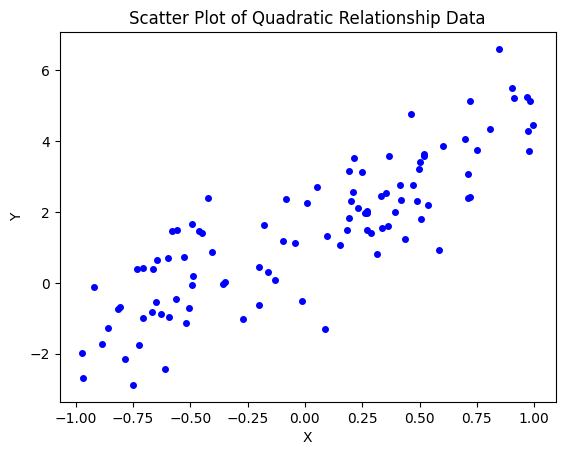

In [3]:
# Setting the sample size
SAMPLE_SIZE = 100

# Generating the dataset
x_quad = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y_quad = 1 + 3 * x_quad + 0.5 * x_quad**2 + np.random.randn(SAMPLE_SIZE)

# Plotting the dataset
plt.plot(x_quad, y_quad, 'bo', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Quadratic Relationship Data')
plt.show()

e) Plot the least squares estimate line through the scatter plot.

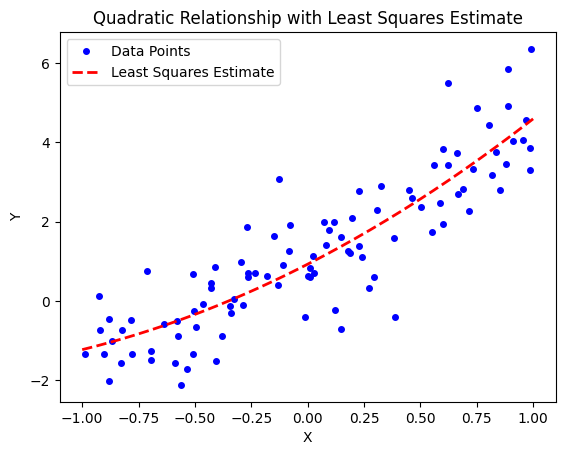

In [4]:
SAMPLE_SIZE = 100

# Generating the dataset for the quadratic relationship
x_quad = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y_quad = 1 + 3 * x_quad + 0.5 * x_quad**2 + np.random.randn(SAMPLE_SIZE)

# Creating the design matrix for quadratic regression
intercept_quad = np.ones(SAMPLE_SIZE)
X_quad = np.array([intercept_quad, x_quad, x_quad**2]).T

# Calculating the least squares estimates for the quadratic model
beta_hat_quad = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ y_quad

# Generating points for the estimated quadratic curve
x_quad_plot = np.linspace(-1, 1, 200)
y_quad_est = beta_hat_quad[0] + beta_hat_quad[1] * x_quad_plot + beta_hat_quad[2] * x_quad_plot**2

# Plotting the estimated quadratic curve over the scatter plot
plt.plot(x_quad, y_quad, 'bo', markersize=4, label='Data Points')
plt.plot(x_quad_plot, y_quad_est, 'r--', lw=2, label='Least Squares Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Relationship with Least Squares Estimate')
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated coefficients for the quadratic model are [1.03, 2.99, 0.38], which are close to the true parameters [1, 3, 0.5]. This shows that the least squares regression has effectively estimated the underlying quadratic relationship, despite some deviation likely caused by the noise in the data.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

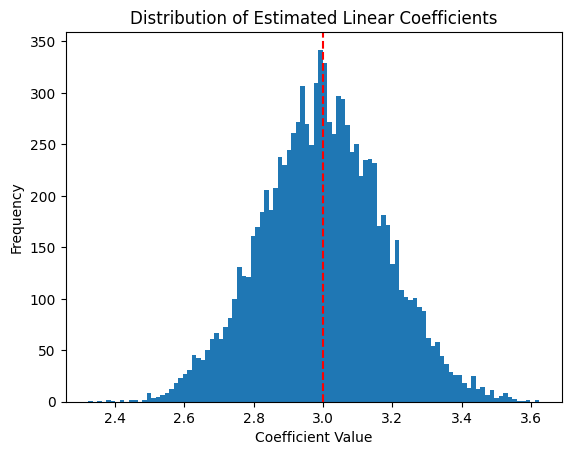

In [5]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
true_beta = np.array([1, 3, 0.5])
betas = []

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x, x**2]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.title("Distribution of Estimated Linear Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.show()
